#### Import the necessary libraries

In [2]:
import warnings
import datetime
import pandas as pd
import numpy as np
import numpy as np
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from ta.utils import dropna
from ta import add_all_ta_features # Used for technical analysis library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import time

warnings.simplefilter('ignore', FutureWarning)

#### Fetch multiple datasets

In [3]:
# fetch multiple asset data
def getMultiAssetData(tickerList, date_from, date_to):
    def getData(ticker):
        data = pdr.DataReader(ticker, 'yahoo', date_from, date_to)
        return data
    datas = map(getData, tickerList)
    return pd.concat(datas, keys=tickerList, names=['Ticker', 'Date'])

#### Obtain the following tickers of interest

XLE - Energy Select Sector SPDR Fund
XLF - Financial Select Selector SPDR Fund
XLI - Industrial Select Sector SPDR
GDX - VanEck Gold Miners ETF
XLK - Technology Select Sector SPDR Fund
XLV - Health Care Select Sector SPDR Fund
XLB - Materials Select Sector SPDR Fund
IYR - iShares U.S. Real Estate ETF

#### --------------------------------------------------------------------------------------------------------------

In [4]:
date_from = datetime.date(2017, 1, 1)
date_to = datetime.date(2022, 2, 18)
tickerList = ['XLE']
multiData = getMultiAssetData(tickerList, date_from, date_to)
multiData.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [5]:
multiData.head

<bound method NDFrame.head of                         High        Low       Open      Close      Volume  \
Ticker Date                                                                 
XLE    2017-01-03  76.809998  75.360001  76.110001  76.169998  24623100.0   
       2017-01-04  76.370003  75.760002  76.230003  76.010002  11185500.0   
       2017-01-05  76.339996  75.459999  76.059998  75.820000  11141200.0   
       2017-01-06  76.150002  75.389999  76.059998  75.889999   7410500.0   
       2017-01-09  75.459999  74.680000  75.389999  74.790001  10960900.0   
...                      ...        ...        ...        ...         ...   
       2022-02-14  70.059998  67.930000  69.980003  68.750000  49816500.0   
       2022-02-15  68.190002  66.680000  67.059998  68.029999  43046100.0   
       2022-02-16  69.769997  68.160004  68.570000  68.580002  36722100.0   
       2022-02-17  69.190002  67.940002  68.519997  68.470001  33811400.0   
       2022-02-18  68.589996  67.389999  67.50

#### --------------------------------------------------------------------------------------------------------------------

#### Retrieving a single ticker

References: https://handsoffinvesting.com/get-40-technical-indicators-for-a-stock-using-python/
            https://analyzingalpha.com/blog/yfinance-python

In [6]:
stock_info = yf.Ticker('TSLA')
hist_data = stock_info.history(start = '2017-01-01', end = '2022-02-18')
hist_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500,0,0.0
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500,0,0.0
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500,0,0.0
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500,0,0.0
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500,0,0.0
...,...,...,...,...,...,...,...
2022-02-11,909.630005,915.960022,850.700012,860.000000,26492700,0,0.0
2022-02-14,861.570007,898.880005,853.150024,875.760010,22585500,0,0.0
2022-02-15,900.000000,923.000000,893.380005,922.429993,19095400,0,0.0


#### Create Features (Explore technical indicators)

Reference: https://medium.com/analytics-vidhya/python-for-stock-analysis-fcff252ca559
           https://technical-analysis-library-in-python.readthedocs.io/en/latest/


In [7]:
mom_data = add_all_ta_features(hist_data, open="Open", high="High", low="Low", 
                               close="Close", volume="Volume")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

C:\Users\kthom\anaconda3\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\kthom\anaconda3\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [8]:
mom_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,volume_sma_em,volume_vpt,volume_vwap,volume_mfi,volume_nvi,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_atr,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_stc,trend_adx,trend_adx_pos,trend_adx_neg,trend_cci,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,29616500,0,0.0,8.502404e+06,29616500,NaN,NaN,NaN,NaN,-2.459184e+07,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,45.092668,41.344667,NaN,0.547847,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.129002,NaN,0.000000,0.000000,0.000000,NaN,267.462375,253.839042,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-83.860041,NaN,0.000000
2017-01-04,42.950001,45.599998,42.862000,45.397999,56067500,0,0.0,5.629699e+07,85684000,NaN,NaN,5.381491,NaN,-2.225253e+07,NaN,NaN,1000.000000,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,46.225333,41.613333,NaN,0.820613,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.896000,NaN,0.000000,0.000000,0.000000,NaN,267.462375,253.839042,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.608507,4.505470,4.608507
2017-01-05,45.284000,45.495998,44.389999,45.349998,29558500,0,0.0,7.805162e+07,56125500,NaN,NaN,2.664111,NaN,2.552622e+06,NaN,NaN,998.942677,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,46.211777,42.399778,NaN,0.773930,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.896000,NaN,0.000000,0.000000,0.000000,NaN,267.462375,253.839042,NaN,NaN,NaN,NaN,44.066002,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.105732,-0.105788,4.497902
2017-01-06,45.386002,46.062000,45.090000,45.801998,27639500,0,0.0,9.090443e+07,83765000,NaN,NaN,2.226080,NaN,2.442277e+05,NaN,NaN,1008.899056,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,46.314666,42.969666,NaN,0.846736,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.127001,NaN,0.000000,0.000000,0.000000,NaN,267.462375,253.839042,NaN,NaN,NaN,44.389999,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996692,0.991757,5.539424
2017-01-09,45.793999,46.383999,45.599998,46.256001,19897500,0,0.0,1.043049e+08,103662500,NaN,NaN,1.639115,NaN,4.727103e+05,NaN,NaN,1018.899549,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,46.424533,43.434933,NaN,0.943627,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.288000,NaN,0.000000,0.000000,0.000000,NaN,267.462375,253.839042,NaN,NaN,NaN,44.389999,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

####  Create 7 day average profit/loss column and a 7 day target column.

References: https://towardsdatascience.com/implementation-of-technical-indicators-into-a-machine-learning-framework-for-quantitative-trading-44a05be8e06

In [9]:

mom_data['Close_Shifted'] = mom_data['Close'].transform(lambda x: x.shift(-6))
mom_data['Target'] = ((mom_data['Close_Shifted'] - mom_data['Open'])/(mom_data['Open']) * 100).shift(-1)
mom_data['Target_Direction'] = np.where(mom_data['Target']>0, 1, 0)

#### Drop unused columns

In [10]:
# These columns are missing large amounts of data
df_1 = mom_data.drop(columns = ['Dividends', 'Stock Splits', 'volatility_bbhi', 'volatility_bbli', 
                                'volatility_kchi', 'volatility_kcli', 'trend_psar_up_indicator', 
                               'trend_psar_down_indicator'])

#### Fill in empty cells

In [11]:
# Fill empy cells with zero
df_2 = df_1.fillna(0)

In [12]:
print(df_2)

                  Open        High         Low       Close    Volume  \
Date                                                                   
2017-01-03   42.972000   44.066002   42.192001   43.397999  29616500   
2017-01-04   42.950001   45.599998   42.862000   45.397999  56067500   
2017-01-05   45.284000   45.495998   44.389999   45.349998  29558500   
2017-01-06   45.386002   46.062000   45.090000   45.801998  27639500   
2017-01-09   45.793999   46.383999   45.599998   46.256001  19897500   
...                ...         ...         ...         ...       ...   
2022-02-11  909.630005  915.960022  850.700012  860.000000  26492700   
2022-02-14  861.570007  898.880005  853.150024  875.760010  22585500   
2022-02-15  900.000000  923.000000  893.380005  922.429993  19095400   
2022-02-16  914.049988  926.429993  901.210022  923.390015  17098100   
2022-02-17  913.260010  918.500000  874.099976  876.349976  18392800   

              volume_adi  volume_obv  volume_cmf     volume_fi 

#### Check for multicollinearity using correlation table and heatmap

In [13]:
# Correlation heatmap
corr = df_2.corr()

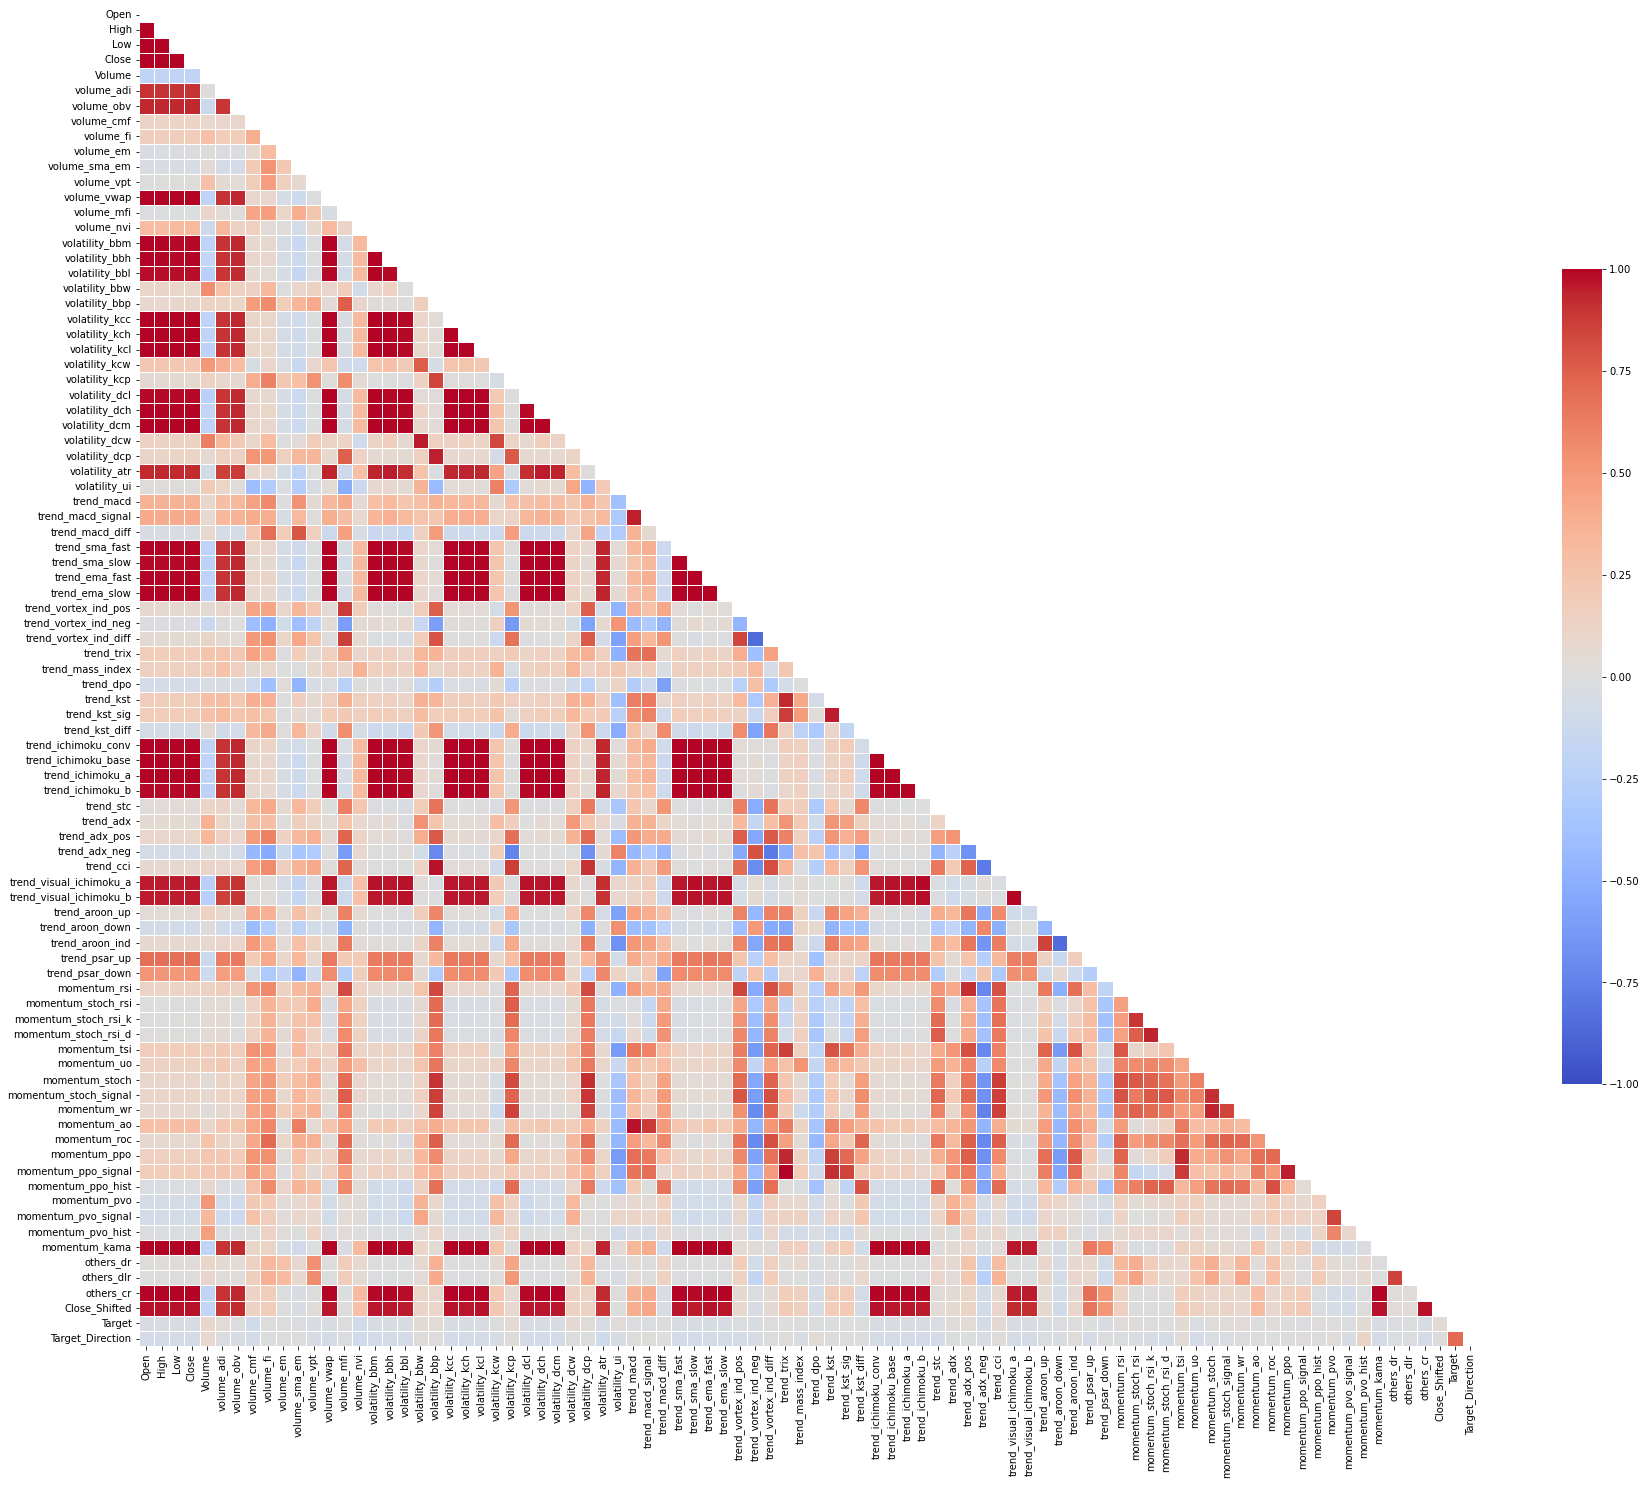

In [14]:
# Create the mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Setup the figure
f, ax = plt.subplots(figsize =(30, 30))

# Create the color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw heatmap
sns.heatmap(corr, mask=mask, vmin =0-1, vmax = 1, cmap = cmap, 
           square=True, linewidth=.5, cbar_kws={"shrink": .5})
plt.show()

In [15]:
df_2.to_csv('full_data.csv')

#### --------------------------------------------------------------------------------------------------------

#### Create training and validation and testing sets

In [16]:
# Conditions for cross_validation
cv = StratifiedKFold(n_splits = 10, shuffle=True, random_state =123)

In [17]:
y = df_2['Target_Direction']
X = df_2.drop(columns = ['Target_Direction', 'Target', 'Close_Shifted'])

# Split into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state= 123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state= 123)

#### Standardize the data

In [18]:
ss = StandardScaler()
scaled_features = ss.fit_transform(X_train)
scaled_features_val = ss.fit_transform(X_val)
scaled_features_test = ss.fit_transform(X_test)

#### Helper Functions

In [19]:
def cross_val_classifier(model, X, y, params, n_splits, scoring):
    """Perfomrs cross validation and returns the best paramaeters and best score"""
    
    start_time = time.time()
    
    # Create the grid search
    grid_search = RandomizedSearchCV(estimator=model,
                                    param_distributions=params, 
                                    cv = n_splits, 
                                    n_iter=20,
                                    scoring = scoring, 
                                    verbose = 1)
    
    # Fit the model
    grid_search.fit(X, y)
    # Best_score
    best_score = grid_search.best_score_
    # Best parameters
    best_parameters = grid_search.best_params_
    
    end_time = time.time()
    run_time = (end_time-start_time)/60
    print(f"The total run time: {run_time} mins")
    print(f"The best parameters are: {best_parameters}")
    print(f"The best scores is: {best_score}")
    print("\n")
    print("\n")
    
    return

In [20]:
def cm_matrix_score(model, X, y):
    """Returns the confusion matrix and classification report"""
    
    start_time = time.time()
    
    # Fit the model
    model.fit(X, y)
    # Predict the accuracy 
    pred_ = model.predict(X)
    
    # Create the confusion matrix
    cm = confusion_matrix(y, pred_, labels = model.classes_)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= model.classes_)
    disp.plot()
    plt.show() 
    
    end_time = time.time()
    run_time = (end_time - start_time)/60
    # Create the classification matrix
    print(type(pred_))
    print(metrics.classification_report(y, pred_))
    
    print(f"The total run time: {run_time} mins")
    
    return

In [21]:
def plot_feature_importance(model, training_data, n_features):
    """Plots the number of important features in a Random Forest Model"""
    
    feature_weights = model.feature_importances_
    feature_names = training_data.columns
    features_df = list(zip(feature_names, feature_weights))

    # Create the dataframe
    features_df1 = pd.DataFrame(features_df, columns=['Features', 'Weights'])

    # Sort Features by absolute value of the weights
    features_df2 = features_df1.sort_values(by = "Weights", key = pd.Series.abs, ascending = False)

    # Obtain the features and weights from data frame that will be used for plotting.
    features_plt = features_df2['Features']
    weights_plt = features_df2['Weights']
    
    
    # Plot the 20 most influential Weights. 
    fig, ax = plt.subplots(figsize=(16,9))

    #Horizontal bar plot
    ax.barh(features_plt[:n_features], weights_plt[:n_features])
    plt.title("20 Most Important Features")
    plt.show()
    
    return features_df2

#### ------------------------------------------------------------------------------------------------------------------

#### Implement a Random Forest Classifier

In [22]:
params = dict(min_samples_split = [2, 5, 10, 15, 30],
             min_samples_leaf = [2, 5, 10, 15, 30], 
             max_depth = [5, 10, 15, 20])
rf = RandomForestClassifier()

In [32]:
test.cross_val_classifier(rf, X_train, y_train, params, 10, 'f1')

AttributeError: module 'test' has no attribute 'cross_val_classifier'

#### Implement the best parameters on the validation set

In [24]:
rf = RandomForestClassifier(min_samples_split=2, min_samples_leaf=5, max_depth=15)

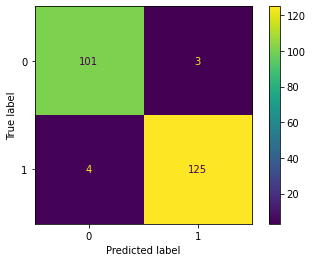

<class 'numpy.ndarray'>
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       104
           1       0.98      0.97      0.97       129

    accuracy                           0.97       233
   macro avg       0.97      0.97      0.97       233
weighted avg       0.97      0.97      0.97       233

The total run time: 0.007580904165903727 mins


In [25]:
cm_matrix_score(rf, X_val, y_val)

#### Plot the feature importance

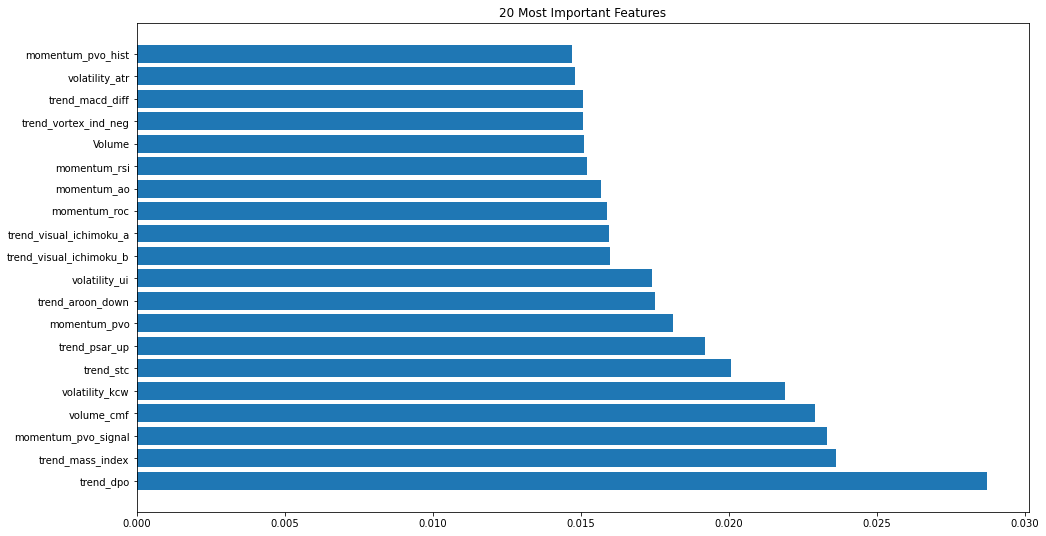

In [26]:
features_df2 = plot_feature_importance(rf, X, 20)

In [27]:
features_df2.head(20)

,Features,Weights
44,trend_dpo,0.028707
43,trend_mass_index,0.023620
79,momentum_pvo_signal,0.023306
7,volume_cmf,0.022919
23,volatility_kcw,0.021906
52,trend_stc,0.020085
62,trend_psar_up,0.019183
78,momentum_pvo,0.018111
60,trend_aroon_down,0.017501
31,volatility_ui,0.017408


#### Perform a correlation on the top 20 features

In [28]:
# Obtain the 20 features from the original dataframe df_2
use_features = features_df2.iloc[:5, 0]

df_features_reduced = df_2.loc[:, use_features]

df_features_reduced

,trend_dpo,trend_mass_index,momentum_pvo_signal,volume_cmf,volatility_kcw
Date,,,,,
2017-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-05,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-06,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01-09,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
2022-02-11,-100.459024,24.887691,-2.107517,-0.109957,10.606630
2022-02-14,-74.516525,24.682167,-3.074256,-0.147882,9.983981
2022-02-15,21.257471,24.420099,-4.116154,-0.097937,9.798881


In [29]:
corr = df_features_reduced.corr()
corr

,trend_dpo,trend_mass_index,momentum_pvo_signal,volume_cmf,volatility_kcw
trend_dpo,1.000000,-0.003083,-0.063186,-0.125598,0.052702
trend_mass_index,-0.003083,1.000000,0.139568,0.052767,0.364308
momentum_pvo_signal,-0.063186,0.139568,1.000000,0.271944,0.321032
volume_cmf,-0.125598,0.052767,0.271944,1.000000,-0.045897
volatility_kcw,0.052702,0.364308,0.321032,-0.045897,1.000000


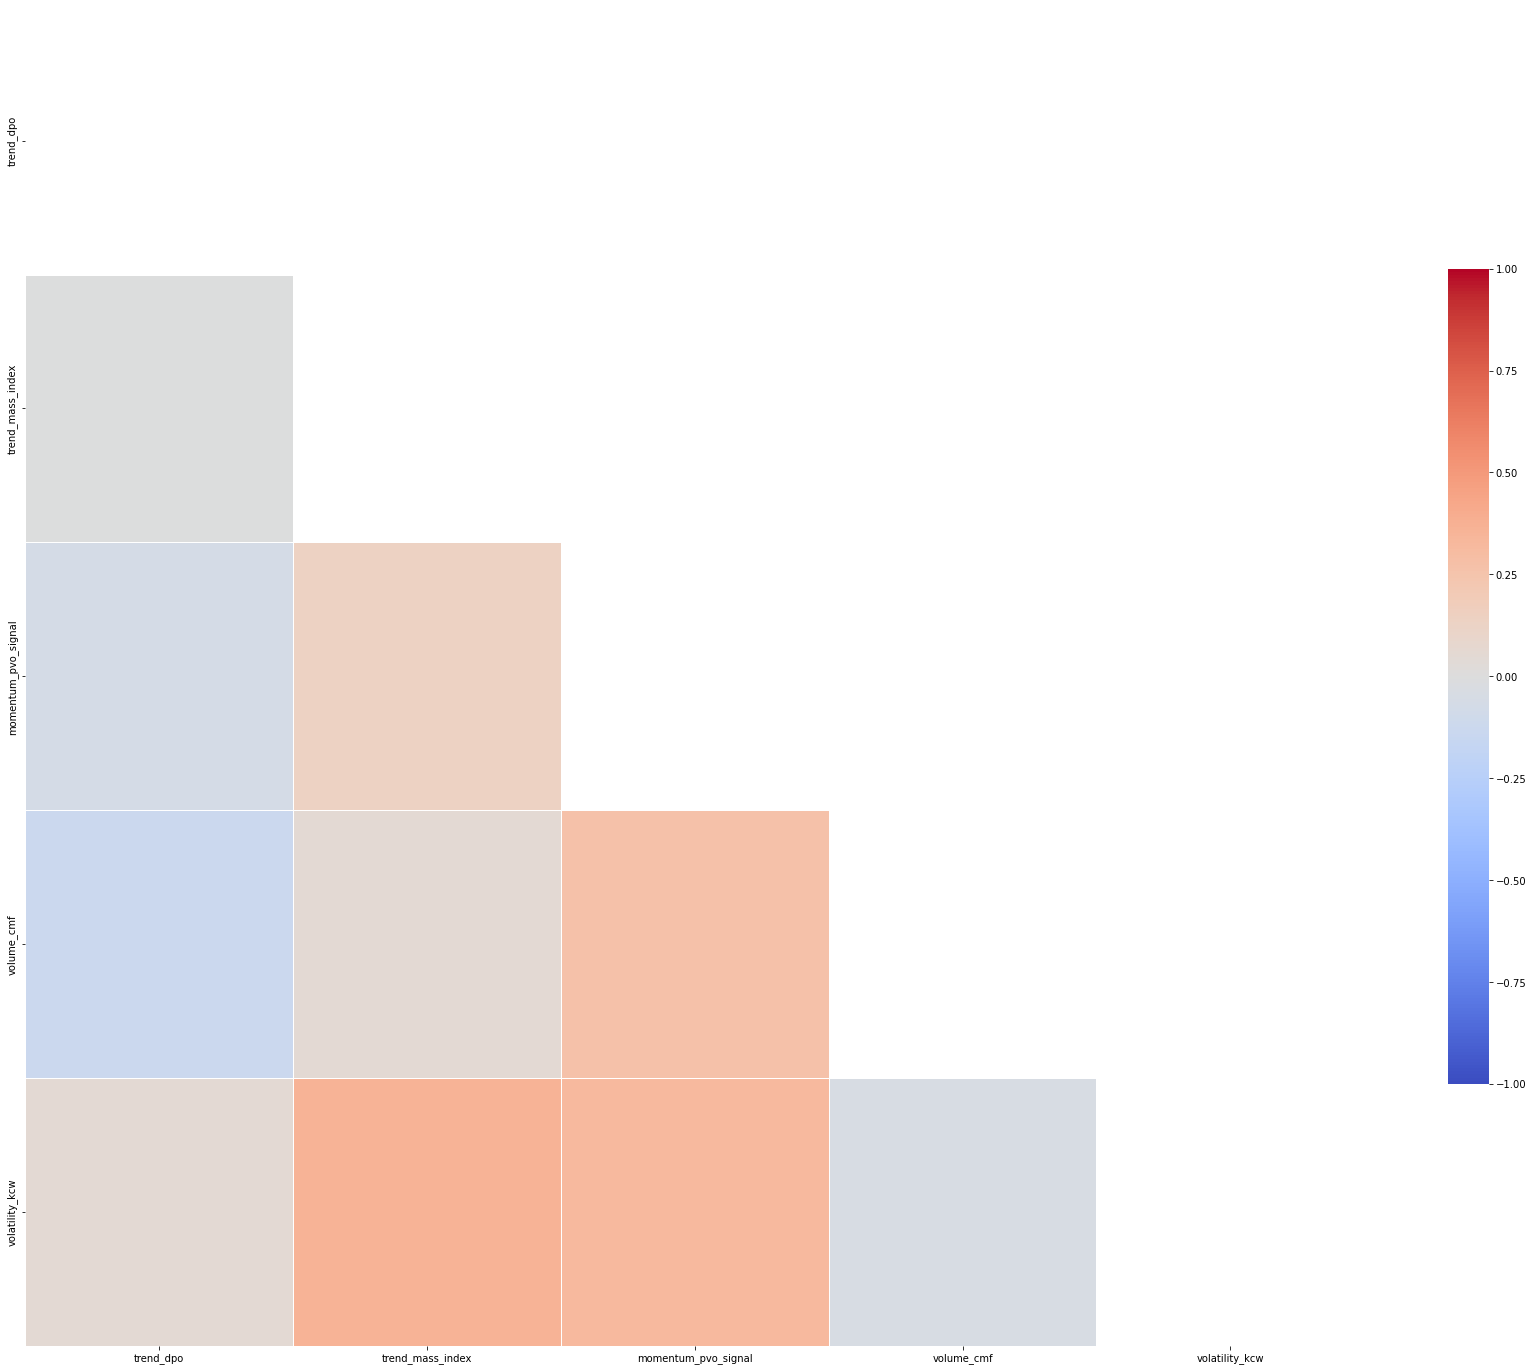

In [30]:
# Create the mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype = bool))

# Setup the figure
f, ax = plt.subplots(figsize =(30, 30))

# Create the color palette
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw heatmap
sns.heatmap(corr, mask=mask, vmin =0-1, vmax = 1, cmap = cmap, 
           square=True, linewidth=.5, cbar_kws={"shrink": .5})
plt.show()